In [78]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
plt.style.use('seaborn-v0_8-colorblind')
import warnings
warnings.filterwarnings('ignore')
from itertools import combinations
import utils
import modeling_utils
import bayes_utils
import joblib
from joblib import dump,load
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error
pd.set_option('display.max_rows', 100)
pd.set_option('display.width',1000)

In [89]:
# Reload utils module to ensure latest changes are loaded
import importlib
import utils
importlib.reload(modeling_utils)
importlib.reload(utils)
importlib.reload(bayes_utils)

<module 'bayes_utils' from 'c:\\Users\\user\\OneDrive\\Documents\\D_I_G\\ML\\Data Analysis Projects\\Facebook Ad Campaign Analysis\\Facebook_Campaign_Review\\bayes_utils.py'>

In [ ]:
data=utils.get_data()
#label age and gender with numeric datatypes
#data=modeling_utils.age_gender_rename(data)
#data=modeling_utils.age_gender_rename(data)
#cap outliers
cap_dict={}#joblib.load('model_feature_ceilings.joblib')
#predict number of leads
lead_model_info=joblib.load('lead_prediction_model_info.joblib')
data=modeling_utils.make_predictions_pipeline(data,lead_model_info,cap_dict)
#predict approved conversions to sale
approved_conversion_model_info=joblib.load('approved_conversion_model_info.joblib')
data=modeling_utils.make_predictions_pipeline(data,approved_conversion_model_info,cap_dict)
#get 3 conversion classes based on age gender and interest, and CostPerMille. 
#These are observed 
data=modeling_utils.get_prob_class(data,'Approved_Conversion','Total_Conversion','Three_Conversion_Classes',3,'ObservedConvClass')
#these are predicted
#data=modeling_utils.add_conversion_rate_prediction(data) #an overfit model
data=modeling_utils.get_conversion_rate_preds(data)
data['Three_Conversion_Classes'].replace((0.0,0.33,0.67),('Low','Medium','High'),inplace=True)

# A closer Look a Campaign C because it is more financially active than the others

In [82]:
utils.sales_funnel_plot(data)

,CostPerMille,ClickThroughRate,ClickToLeadRate,ConversionRate
0,0.250558,0.016221,0.149409,0.324116


# predictive modeling per age, gender, interests, and spent  

In [83]:
modeling_utils.leads_sales_plots(data)

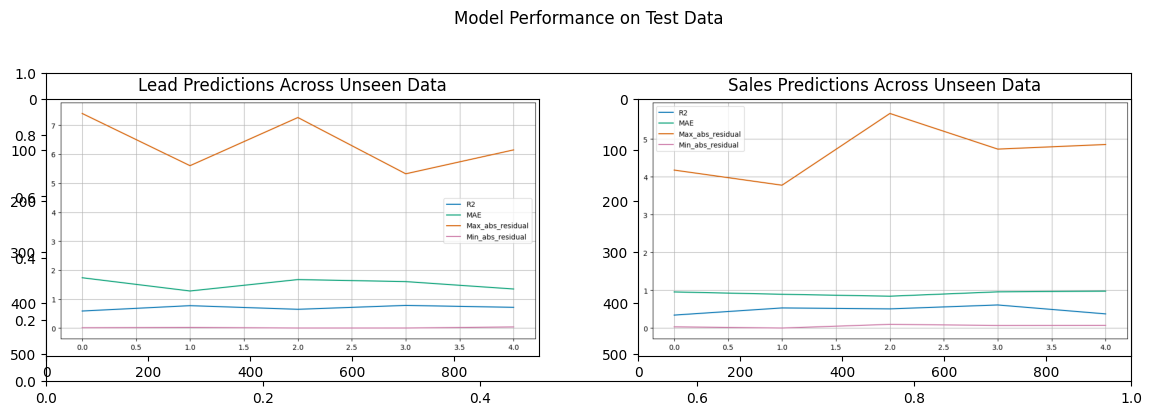

In [84]:

modeling_utils.unseen_data_report()

# Contrary to modeling number of leads and sales, there is no significant relationship between Y->(the rate of leads converted to sales) and X->(demographics and cost per mille (1,000 impressions))  
### See the below plots for details

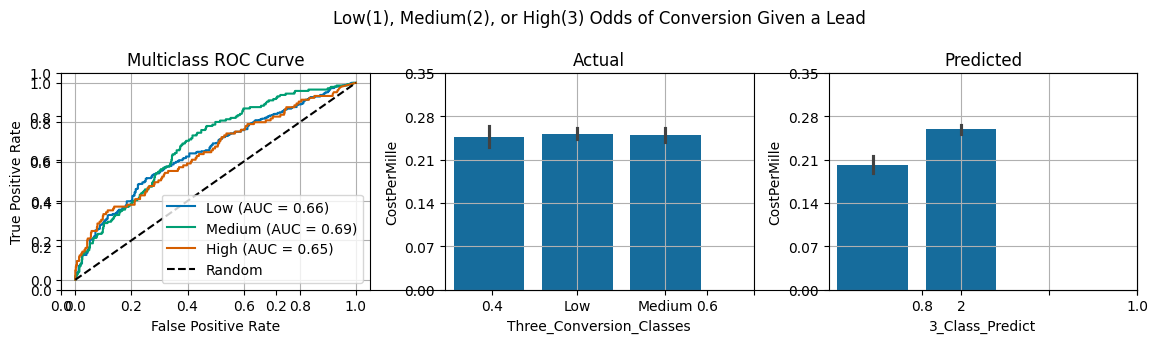

In [92]:
determination=''
modeling_utils.plot_classification(data,determination)

In [93]:

modeling_utils.parallel_plot(data)